# NDVI

In [1]:
import io
from pathlib import Path

import pandas as pd
import xarray as xr

import async_retriever as ar

Let's use the DAAC server to get [NDVI](https://daac.ornl.gov/VEGETATION/guides/US_MODIS_NDVI.html).
We can use `AsyncRetriever` and pass it directly to `xarray.open_mfdataset`.

In [2]:
west, south, east, north = (-69.77, 45.07, -69.31, 45.45)
base_url = "https://thredds.daac.ornl.gov/thredds/ncss/ornldaac/1299"
dates_itr = ((pd.to_datetime(f"{y}0101"), pd.to_datetime(f"{y}0131")) for y in range(2000, 2005))
urls, kwds = zip(
    *(
        (
            f"{base_url}/MCD13.A{s.year}.unaccum.nc4",
            {
                "params": {
                    "var": "NDVI",
                    "north": f"{north}",
                    "west": f"{west}",
                    "east": f"{east}",
                    "south": f"{south}",
                    "disableProjSubset": "on",
                    "horizStride": "1",
                    "time_start": s.strftime("%Y-%m-%dT%H:%M:%SZ"),
                    "time_end": e.strftime("%Y-%m-%dT%H:%M:%SZ"),
                    "timeStride": "1",
                    "addLatLon": "true",
                    "accept": "netcdf",
                }
            },
        )
        for s, e in dates_itr
    )
)
resp = ar.retrieve(urls, "binary", request_kwds=kwds, max_workers=8)
data = xr.open_mfdataset(io.BytesIO(r) for r in resp)

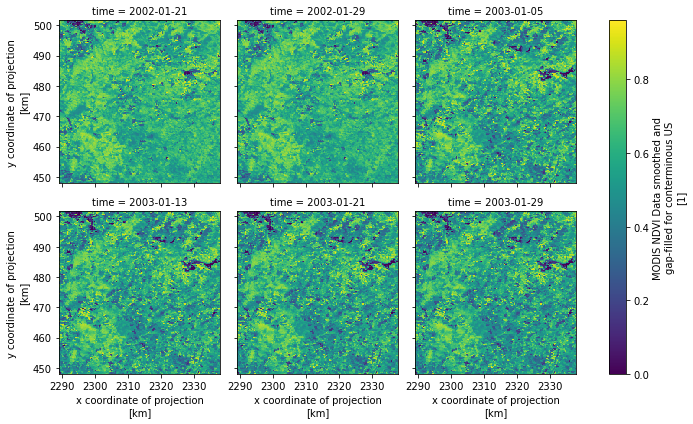

In [4]:
ax = data.isel(time=slice(10, 16)).NDVI.plot(x="x", y="y", row="time", col_wrap=3)
ax.fig.savefig(Path("_static", "ndvi.png"), bbox_inches="tight", facecolor="w")